# Social dimension (Who)
* Misinformation detection exploiting user features
* Detection of malicious users: can we distinguish malicious from gullible users?
* Detection of superspreaders: abnormal rates of misinformation spread
* Detection of sources of misinformation: first users to share misinformation

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from utils import preprocess
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from gensim.models import Word2Vec

%matplotlib inline
sns.set(style="darkgrid")

## Load data users data

In [146]:
# users
df_users = pd.read_csv('data/2018/users.csv')

# credibility score with laplace smoothing

df_users['credibility'] = 1-df_users['misinformation']/(df_users['virals']+1)
df_users.head(5)

,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,viral_messages,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,61,0.013876,152,668192,96,5856,13,72,936.0,0.002957,0.213115,"kkk<>kkk<>kkk<>- casar poder ajudar , colocar ...",0.790323
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,257,0.110206,1640,498105,936,30402,78,720,6955.0,0.033448,0.303502,"apo tres escola militar irar final soletrar , ...",0.697674
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,246,0.119186,525,389426,307,25786,89,246,7169.0,0.043120,0.361789,kkk urna sao fraudar kkk desculpar ha ja dar n...,0.639676
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,128,0.063366,738,644385,415,19752,27,290,2539.0,0.013366,0.210938,"* ordem mear caos , sucesso escola militar . *...",0.790698
4,170916900626840870,1,1810,828,0.457459,982,0.542541,115,0.063536,152,275120,96,11040,73,72,5256.0,0.040331,0.634783,absurdo . \n \n ministro claramente defensor e...,0.370690


In [147]:
df_users = df_users[df_users['virals'] > 1]
df_users[df_users['midia_ratio']>df_users['viral_ratio']]

,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,viral_messages,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,61,0.013876,152,668192,96,5856,13,72,936.0,0.002957,0.213115,"kkk<>kkk<>kkk<>- casar poder ajudar , colocar ...",0.790323
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,257,0.110206,1640,498105,936,30402,78,720,6955.0,0.033448,0.303502,"apo tres escola militar irar final soletrar , ...",0.697674
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,246,0.119186,525,389426,307,25786,89,246,7169.0,0.043120,0.361789,kkk urna sao fraudar kkk desculpar ha ja dar n...,0.639676
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,128,0.063366,738,644385,415,19752,27,290,2539.0,0.013366,0.210938,"* ordem mear caos , sucesso escola militar . *...",0.790698
4,170916900626840870,1,1810,828,0.457459,982,0.542541,115,0.063536,152,275120,96,11040,73,72,5256.0,0.040331,0.634783,absurdo . \n \n ministro claramente defensor e...,0.370690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,2748195336393681776,1,6,3,0.500000,3,0.500000,2,0.333333,74,444,36,72,1,27,27.0,0.166667,0.500000,ir deslike 👎 🏽 denunciar video 👇 🏾 👇 🏾 👇 🏾 👇 🏾...,0.666667
3540,-6741113122017113152,2,6,2,0.333333,4,0.666667,2,0.333333,283,987,116,140,2,78,91.0,0.333333,1.000000,"nao saber gravar , merecer respeitar ! melhor ...",0.333333
3544,2936984556297761998,1,6,3,0.500000,3,0.500000,2,0.333333,152,912,96,192,1,72,72.0,0.166667,0.500000,😉 😉 😉 😉 😽 😹 \n bolsonaro mourao estao pizzaria...,0.666667
3609,5129288297298079376,1,5,2,0.400000,3,0.600000,2,0.400000,167,835,85,170,2,63,126.0,0.400000,1.000000,* votar sera acordar palavra . doer doer . * \...,0.333333


# Associate misinformation with information of the first user that shared

In [149]:

# dataset with labelled data
df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018_content_only.csv')

# select only labelled data
# df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
# df = df[df['midia']==0]
# df = df[df['misinformation']!=-1]

# sorting by time
def custom_time(data,hora):
    string = data + " " + hora
    return string

df['timestamp'] = df.apply(lambda x: custom_time(x['date'],x['hour']),axis=1)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M')
df.sort_values(by='timestamp',inplace=True)

df.drop_duplicates(subset='text', inplace = True)
df = df[['id','text','misinformation', 'timestamp']]
df['label'] = ['misinformation' if m == 1 else 'non-misinformation' for m in df['misinformation']]
print(len(df))
df.head()

6926


,id,text,misinformation,timestamp,label
0,6942577183305588053,"O dia em que ex-guerrilheiro, militantes e des...",1,2018-07-02 10:46:00,misinformation
1,-2072140886659020977,O nível dos jornalistas do programa Roda Viva ...,1,2018-07-02 10:50:00,misinformation
2,-5100443702615645928,*Atenção*\n\nPrecisamos da ajuda de todos você...,0,2018-07-02 11:03:00,non-misinformation
3,-1561843698204261697,"Gestão do colombiano na capital, imagina ele n...",1,2018-07-02 16:32:00,misinformation
4,-5876784761398352499,🛑🛑🛑🛑🛑🛑\nInterrompendo momentaneamente a conver...,1,2018-07-02 18:09:00,misinformation


In [150]:
viral_ratio = []
viral_strenght = []
midia_ratio = []
credibility = []

for u in df['id']:
    user = df_users[df_users['id']==u]
    
    vr = user['viral_ratio'].values[0]
    mr = user['misinformation_ratio'].values[0]
    cr = user['credibility'].values[0]
    vs = user['viral_strenght'].values[0]
    
    viral_ratio.append(vr)
    midia_ratio.append(mr)
    credibility.append(cr)
    viral_strenght.append(vs)

df['user_viral_ratio'] = viral_ratio
df['user_viral_strenght'] = viral_strenght
df['user_midia_ratio'] = midia_ratio
df['user_credibility'] = credibility

IndexError: index 0 is out of bounds for axis 0 with size 0

In [144]:
df[df['user_midia_ratio'] > df['user_viral_ratio']]

KeyError: 'user_midia_ratio'

relation of viral ratio and midia ratio from the first user who share a viral message


<AxesSubplot:xlabel='user_midia_ratio', ylabel='user_viral_ratio'>

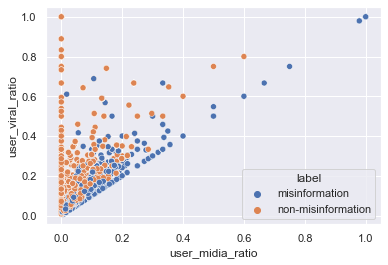

In [113]:
print('relation of viral ratio and midia ratio from the first user who share a viral message')
sns.scatterplot(data=df, x="user_midia_ratio", y="user_viral_ratio", hue="label")

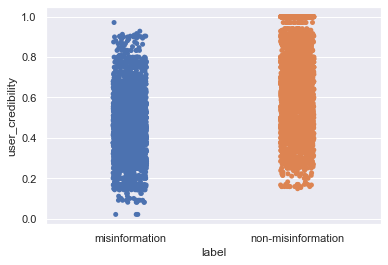

In [114]:
ax = sns.stripplot(x="label", y="user_credibility", data=df)

From this chart we observe that the credibility is not a good indicator to detect misinformation

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


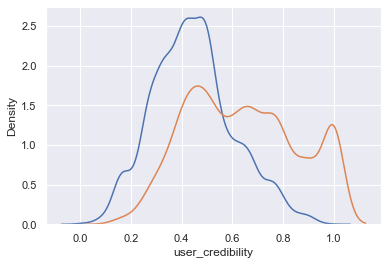

In [115]:
sns.distplot(df[df['label']=='misinformation']['user_credibility'], hist=False, rug=False)
sns.distplot(df[df['label']=='non-misinformation']['user_credibility'], hist=False, rug=False)

plt.show()

# Exploiting user information to detect misinformation

In [80]:
# messages
df_train = pd.read_csv('data/2018/train-test/train.csv')
df_test = pd.read_csv('data/2018/train-test/test.csv')

In [81]:
df_train['preprocessed_text'] = [preprocess(t) for t in df_train['text']]
df_test['preprocessed_text'] = [preprocess(t) for t in df_test['text']]

In [82]:
df_users.columns

Index(['id', 'groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
       'midia_ratio', 'virals', 'viral_ratio', 'degree_centrality', 'strenght',
       'viral_degree_centrality', 'viral_strenght', 'misinformation',
       'misinformation_degree_centrality', 'misinformation_strenght',
       'misinformation_ratio', 'viral_misinformation_ratio', 'viral_messages',
       'credibility'],
      dtype='object')

In [116]:
def acquire_user_info(df_target, df_origin):
    viral_ratio = []
    viral_strenght = []
    midia_ratio = []
    
    for m in df_target['text']:
        user_info = df_origin[df_origin['text']==m]
        user_info.sort_values(by='timestamp')
        vr = user_info['user_viral_ratio'].values[0]
        vs = user_info['user_viral_strenght'].values[0]
        mr = user_info['user_midia_ratio'].values[0]
        
        viral_ratio.append(vr)
        viral_strenght.append(vs)
        midia_ratio.append(mr)
    
    df_target['midia_ratio'] = midia_ratio
    df_target['viral_ratio'] = viral_ratio
    df_target['viral_strenght'] = viral_strenght
    
    return df_target

df_train = acquire_user_info(df_train, df)
df_test = acquire_user_info(df_test, df)    

In [117]:
df_train

,text,misinformation,original,id_message,preprocessed_text,users_engaged,viral_ratio0,midia_ratio1,viral_ratio2,midia_ratio3,...,midia_ratio13,viral_ratio14,midia_ratio15,viral_ratio16,midia_ratio17,viral_ratio18,midia_ratio19,midia_ratio,viral_ratio,viral_strenght
0,A ESQUERDA ACABOU. SAIBA POR QUÊ.\npor Stephen...,1,1,0,esquerdo acabar saber que \n stephen kanitz ar...,"[-5426274422942733548, 3076210903474883370, -4...",0.397472,0.394663,0.177305,0.560284,...,0.619512,0.129032,0.524194,0.0,0.0,0.0,0.0,0.127660,0.177305,725
1,Leiam esse artigo \n\n\nA ESQUERDA ACABOU. SAI...,1,0,0,ler artigo \n \n \n esquerdo acabar saber que ...,"[-5426274422942733548, 3076210903474883370, -4...",0.397472,0.394663,0.177305,0.560284,...,0.619512,0.129032,0.524194,0.0,0.0,0.0,0.0,0.213483,0.397472,30884
2,A ESQUERDA ACABOU. SAIBA POR QUÊ?\npor Stephen...,1,0,0,esquerdo acabar saber que ? \n stephen kanitz ...,"[-5426274422942733548, 3076210903474883370, -4...",0.397472,0.394663,0.177305,0.560284,...,0.619512,0.129032,0.524194,0.0,0.0,0.0,0.0,0.080412,0.144330,3010
3,A ESQUERDA ACABOU. SAIBA POR QUÊ.\npor Stephen...,1,0,0,esquerdo acabar saber que \n stephen kanitz \n...,"[-5426274422942733548, 3076210903474883370, -4...",0.397472,0.394663,0.177305,0.560284,...,0.619512,0.129032,0.524194,0.0,0.0,0.0,0.0,0.166667,0.250000,87
4,A ESQUERDA ACABOU. SAIBA POR QUÊ.\npor Stephen...,1,0,0,esquerdo acabar saber que \n stephen kanitz \n...,"[-5426274422942733548, 3076210903474883370, -4...",0.397472,0.394663,0.177305,0.560284,...,0.619512,0.129032,0.524194,0.0,0.0,0.0,0.0,0.141463,0.190244,3705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,ATENÇÃO ELEITORES DE BOLSONARO EM BELÉM DO PAR...,0,1,3301,atarncao eleitor bolsonaro belem parar \n \n c...,[6725197815278150308],0.255556,0.522222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.033333,0.255556,1539
6229,"""DITA DURA"".\n\nPara:\n""Ninguém é igual a ning...",1,1,3302,dizer duro \n \n \n ninguem igual ninguem todo...,"[-6390182476839371745, -6433788305811138375, 8...",0.165517,0.609195,0.121843,0.705808,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.076389,0.121843,18528
6230,GRANDE CARLOS DRUMOND DE ANDRADE: ...,1,0,3302,grande carlos drumond andrade dizer duro \n \n...,"[-6390182476839371745, -6433788305811138375, 8...",0.165517,0.609195,0.121843,0.705808,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.121839,0.165517,4320
6231,"CARLOS DRUMOND DE ANDRADE\n\nDITA DURA\n""Ningu...",1,0,3302,carlos drumond andrade \n \n dizer duro \n nin...,"[-6390182476839371745, -6433788305811138375, 8...",0.165517,0.609195,0.121843,0.705808,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.122685,0.180556,3900


In [85]:
# include viral strenght
# X_train = df_train[['midia_ratio','viral_ratio', 'viral_strenght']].to_numpy()
# X_test = df_test[['midia_ratio','viral_ratio', 'viral_strenght']].to_numpy()
# y_train = df_train['misinformation']
# y_test = df_test['misinformation']
# X_train,X_test = utils.z_score(X_train,X_test)
# X_train.shape


X_train = df_train[['midia_ratio','viral_ratio']].to_numpy()
X_test = df_test[['midia_ratio','viral_ratio']].to_numpy()
y_train = df_train['misinformation']
y_test = df_test['misinformation']
X_train.shape

with open('train_user_features.npy', 'wb') as f:
    np.save(f, X_train)
    
with open('test_user_features.npy', 'wb') as f:
    np.save(f, X_test)

logistic regression + user info
0.45
              precision    recall  f1-score   support

           0       0.77      0.53      0.63       834
           1       0.61      0.82      0.70       740

    accuracy                           0.67      1574
   macro avg       0.69      0.68      0.66      1574
weighted avg       0.69      0.67      0.66      1574

AUC:  0.7441562965843542


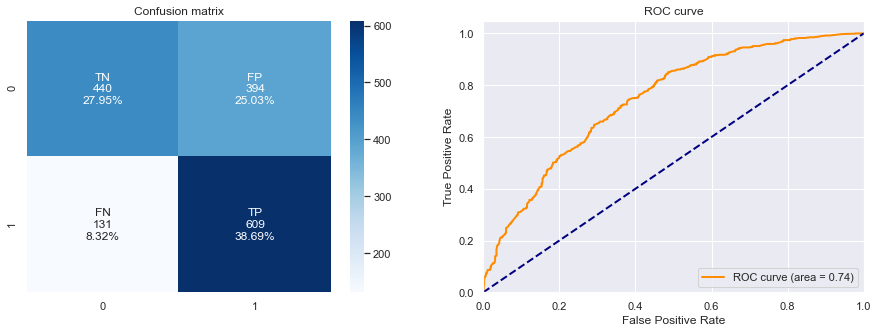

0,666
0,373
0,607
0,822
0,698
0,744


(0.6664548919949174,
 0.3736654804270463,
 0.6071784646061814,
 0.822972972972973,
 0.6987951807228916,
 0.7441562965843542)

In [86]:
print('logistic regression + user info')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

mlp + user
0 
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
ACC: 0.681
1 
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
ACC: 0.521
2 
hidden layers: (50, 175, 200); alpha: 0.00013; learning rate: 0.00506; batch: 300
ACC: 0.681
3 
hidden layers: (350, 225); alpha: 0.00000; learning rate: 0.00011; batch: 200
ACC: 0.643
4 
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
ACC: 0.670

--------------------
BEST PARAMETERS (validation AUC = 0.681)
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
--------------------
0.5
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       834
           1       0.62      0.81      0.70       740

    accuracy                           0.67      1574
   macro avg       0.69      0.68      0.67      1574
weighted avg       0.69      0.67      0.67      1574

AUC:  0.7480863957482662


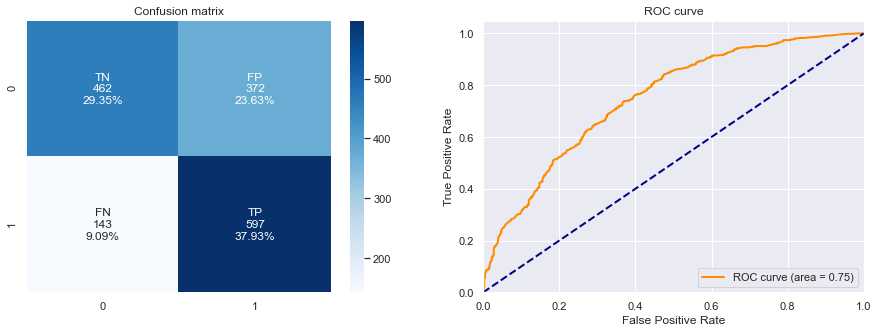

0,672
0,357
0,616
0,806
0,698
0,748


(0.6728081321473952,
 0.3578874218207089,
 0.6160990712074303,
 0.8067567567567567,
 0.6986541837331772,
 0.7480863957482662)

In [87]:
print('mlp + user')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=5)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

# Combining with text

## User + Word2Vec

In [ ]:
w2v = Word2Vec.load("data/2018/word2vec.model")
X_train_w = utils.vectorize_corpus(w2v, df_train['preprocessed_text'])
X_test_w = utils.vectorize_corpus(w2v, df_test['preprocessed_text'])
X_train_u = df_train[['midia_ratio','viral_ratio']].to_numpy()
X_test_u = df_test[['midia_ratio','viral_ratio']].to_numpy()

In [ ]:
X_train = np.concatenate((X_train_w, X_train_u), axis=1)
X_test = np.concatenate((X_test_w, X_test_u), axis=1)

In [ ]:
print('logistic regression + user info + w2v')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

In [ ]:
print('mlp + user + w2v')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=10)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

## TF-IDF + users

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 20000, ngram_range = (1,1), #(1,3)  #15000
                             lowercase = False, token_pattern = r'[^\s]+',binary=True)

tfidf.fit(df_train['preprocessed_text'])   
X_train_tfidf = tfidf.transform(df_train['preprocessed_text']).todense()
X_test_tfidf = tfidf.transform(df_test['preprocessed_text']).todense()
X_train_tfidf.shape

In [ ]:
X_train = np.concatenate((X_train_tfidf, X_train_u), axis=1)
X_test = np.concatenate((X_test_tfidf, X_test_u), axis=1)

In [ ]:
print('logistic regression + user info + tfidf')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

In [ ]:
print('mlp + user + tfidf')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=10)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

# First K users

In [97]:
df_full = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
df_train = pd.read_csv('data/2018/train-test/train.csv')
df_test = pd.read_csv('data/2018/train-test/test.csv')
df_train['preprocessed_text'] = [preprocess(t) for t in df_train['text']]
df_test['preprocessed_text'] = [preprocess(t) for t in df_test['text']]

print(df_full.columns)
df_full = df_full[df_full['midia']==0]
df_full = df_full[df_full['misinformation']!=-1]
df_full['timestamp'] = df_full.apply(lambda x: custom_time(x['date'],x['hour']),axis=1)
df_full['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M')
df_full.sort_values(by='timestamp',inplace=True)
df_full = df_full[['id','timestamp','text', 'misinformation']]
print(len(df_full))
df_full.head()

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['id', 'date', 'hour', 'ddi', 'country', 'country_iso3', 'ddd', 'state',
       'group', 'midia', 'url', 'characters', 'words', 'viral', 'shares',
       'text', 'misinformation'],
      dtype='object')
23660


,id,timestamp,text,misinformation
1,3631133147603888180,2018-07-02 10:50:00,O Bolsonaro tem que estar preparado pra respon...,0
15,3631133147603888180,2018-08-01 11:08:00,"No dia 07 de Outubro, quando for votar, não es...",1
26,-4391661641377612003,2018-08-01 16:28:00,Devido a aborrecimentos nas varias redes socia...,0
43,3631133147603888180,2018-08-02 17:28:00,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0
73,-4391661641377612003,2018-08-09 17:21:00,"O Brasil que eu quero, é um Brasil com mais FR...",0


In [98]:
def get_engaged_users(df_target):
    message_id_2_users = {}    
    for m_id in set(df_target['id_message']):
        message_users = []
        messages = df_target[df_target['id_message']==m_id]['text']
        for m in messages:
            message_users.append(df_full[df_full['text']==m])
        
        df_message_users = pd.concat(message_users)
        df_message_users.sort_values(by='timestamp', inplace = True)
        df_message_users.drop_duplicates(subset='id', inplace = True)
        message_id_2_users[m_id] = list(df_message_users['id'])
    
    users_engaged = []
    for m_id in df_target['id_message']:
        users_engaged.append(message_id_2_users[m_id])
    
    df_target['users_engaged'] = users_engaged
    return df_target

df_train = get_engaged_users(df_train)
df_test = get_engaged_users(df_test)

In [99]:
df_train.head(3)

,text,misinformation,original,id_message,preprocessed_text,users_engaged
0,A ESQUERDA ACABOU. SAIBA POR QUÊ.\npor Stephen...,1,1,0,esquerdo acabar saber que \n stephen kanitz ar...,"[-5426274422942733548, 3076210903474883370, -4..."
1,Leiam esse artigo \n\n\nA ESQUERDA ACABOU. SAI...,1,0,0,ler artigo \n \n \n esquerdo acabar saber que ...,"[-5426274422942733548, 3076210903474883370, -4..."
2,A ESQUERDA ACABOU. SAIBA POR QUÊ?\npor Stephen...,1,0,0,esquerdo acabar saber que ? \n stephen kanitz ...,"[-5426274422942733548, 3076210903474883370, -4..."


In [100]:
def get_k_users_info(df_target, k):
    k_features = [[] for i in range(k*2)]
    for users in df_target['users_engaged']:
        users = users[0:k]
        if len(users) < k:
            users += [0]*(k-len(users))
            
        i = 0    
        for u in users:
            if u == 0:
                k_features[i].append(0)
                i+=1
                k_features[i].append(0)
                i+=1
                continue
            
            vr = df_users[df_users['id']==u]['viral_ratio'].values[0]
            k_features[i].append(vr)
            i += 1
            
            mr = df_users[df_users['id']==u]['midia_ratio'].values[0]
            k_features[i].append(mr)
            i += 1
        
    for i in range(0, k*2, 2):
        col_vr = 'viral_ratio' + str(i)
        df_target[col_vr] = k_features[i] 

        col_mr = 'midia_ratio' + str(i+1)
        df_target[col_mr] = k_features[i+1]
        
    return df_target

K = 10 
df_train = get_k_users_info(df_train, K)
df_test = get_k_users_info(df_test, K) 

In [101]:
k = 3
first_user = -K*2
last_user = first_user + k*2
df_train[df_train.columns[first_user:last_user]]

,viral_ratio0,midia_ratio1,viral_ratio2,midia_ratio3,viral_ratio4,midia_ratio5
0,0.397472,0.394663,0.177305,0.560284,0.144330,0.731959
1,0.397472,0.394663,0.177305,0.560284,0.144330,0.731959
2,0.397472,0.394663,0.177305,0.560284,0.144330,0.731959
3,0.397472,0.394663,0.177305,0.560284,0.144330,0.731959
4,0.397472,0.394663,0.177305,0.560284,0.144330,0.731959
...,...,...,...,...,...,...
6228,0.255556,0.522222,0.000000,0.000000,0.000000,0.000000
6229,0.165517,0.609195,0.121843,0.705808,0.045643,0.568465
6230,0.165517,0.609195,0.121843,0.705808,0.045643,0.568465
6231,0.165517,0.609195,0.121843,0.705808,0.045643,0.568465


In [102]:
X_train = df_train[df_train.columns[first_user:last_user]].to_numpy()
X_test = df_test[df_test.columns[first_user:last_user]].to_numpy()
y_train = df_train['misinformation']
y_test = df_test['misinformation']
X_train,X_test = utils.z_score(X_train,X_test)
X_train.shape

(6233, 6)

### Classification

logistic regression + user info
0.53
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       834
           1       0.59      0.61      0.60       740

    accuracy                           0.62      1574
   macro avg       0.62      0.62      0.62      1574
weighted avg       0.62      0.62      0.62      1574

AUC:  0.6470437163782488


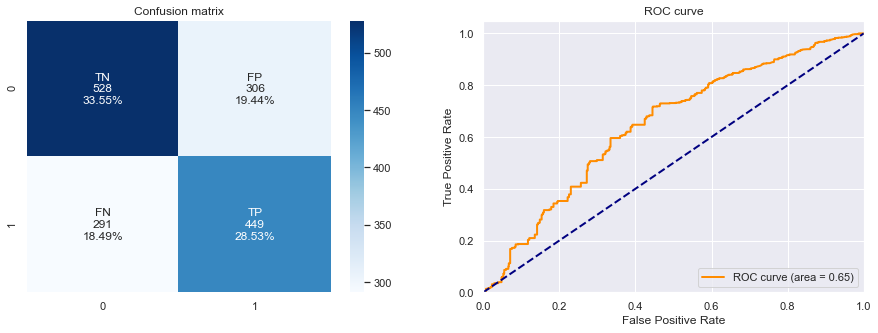

0,620
0,361
0,594
0,606
0,600
0,647


(0.6207115628970775,
 0.36116152450090744,
 0.5947019867549669,
 0.6067567567567568,
 0.6006688963210702,
 0.6470437163782488)

In [103]:
print('logistic regression + user info')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

mlp + k user info
0 
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
ACC: 0.665
1 
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
ACC: 0.588
2 
hidden layers: (50, 175, 200); alpha: 0.00013; learning rate: 0.00506; batch: 300
ACC: 0.753
3 
hidden layers: (350, 225); alpha: 0.00000; learning rate: 0.00011; batch: 200
ACC: 0.651
4 
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
ACC: 0.692
5 
hidden layers: (200, 25, 50); alpha: 0.00000; learning rate: 0.06823; batch: 150
ACC: 0.635
6 
hidden layers: (200,); alpha: 0.00001; learning rate: 0.02102; batch: 250
ACC: 0.692
7 
hidden layers: (25, 25, 125); alpha: 0.00030; learning rate: 0.00686; batch: 250
ACC: 0.755
8 
hidden layers: (125, 250); alpha: 0.00006; learning rate: 0.00691; batch: 100
ACC: 0.779
9 
hidden layers: (200, 250); alpha: 0.00757; learning rate: 0.00911; batch: 200
ACC: 0.660

--------------------
BEST PARAMETERS (validation AUC = 0.779)


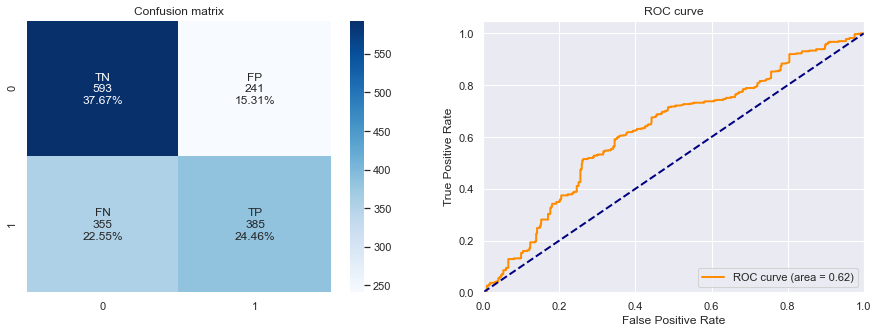

0,621
0,334
0,615
0,520
0,563
0,624


(0.6213468869123253,
 0.33445566778900127,
 0.6150159744408946,
 0.5202702702702703,
 0.5636896046852123,
 0.6246751247650528)

In [104]:
print('mlp + k user info')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=10)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

## TF-IDF + k users

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 20000, ngram_range = (1,1), #(1,3)  #15000
                             lowercase = False, token_pattern = r'[^\s]+',binary=True)

tfidf.fit(df_train['preprocessed_text'])   
X_train_tfidf = tfidf.transform(df_train['preprocessed_text']).todense()
X_test_tfidf = tfidf.transform(df_test['preprocessed_text']).todense()
X_train_tfidf.shape

(6233, 17527)

In [106]:
X_train_u = df_train[df_train.columns[first_user:last_user]].to_numpy()
X_test_u = df_test[df_test.columns[first_user:last_user]].to_numpy()
X_train_u , X_test_u = utils.z_score(X_train_u, X_test_u)

X_train = np.concatenate((X_train_tfidf, X_train_u), axis=1)
X_test = np.concatenate((X_test_tfidf, X_test_u), axis=1)

logistic regression + k user info + tfidf


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.47
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       834
           1       0.79      0.80      0.79       740

    accuracy                           0.81      1574
   macro avg       0.81      0.81      0.81      1574
weighted avg       0.81      0.81      0.81      1574

AUC:  0.8913490828958455


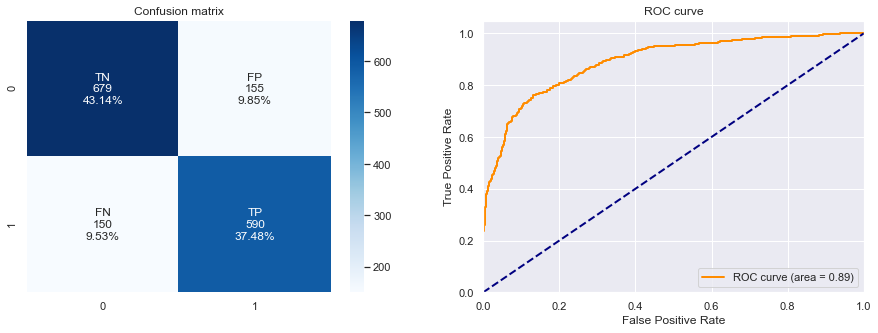

0,806
0,183
0,791
0,797
0,794
0,891


(0.8062261753494282,
 0.18340348767288028,
 0.7919463087248322,
 0.7972972972972973,
 0.7946127946127945,
 0.8913490828958455)

In [107]:
print('logistic regression + k user info + tfidf')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

mlp + k user info + tfidf
0 
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
ACC: 0.869
1 
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
ACC: 0.883
2 
hidden layers: (50, 175, 200); alpha: 0.00013; learning rate: 0.00506; batch: 300
ACC: 0.873
3 
hidden layers: (350, 225); alpha: 0.00000; learning rate: 0.00011; batch: 200
ACC: 0.894
4 
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
ACC: 0.878
5 
hidden layers: (200, 25, 50); alpha: 0.00000; learning rate: 0.06823; batch: 150
ACC: 0.878
6 
hidden layers: (200,); alpha: 0.00001; learning rate: 0.02102; batch: 250
ACC: 0.889
7 
hidden layers: (25, 25, 125); alpha: 0.00030; learning rate: 0.00686; batch: 250
ACC: 0.889
8 
hidden layers: (125, 250); alpha: 0.00006; learning rate: 0.00691; batch: 100
ACC: 0.883
9 
hidden layers: (200, 250); alpha: 0.00757; learning rate: 0.00911; batch: 200
ACC: 0.878

--------------------
BEST PARAMETERS (validation AUC =

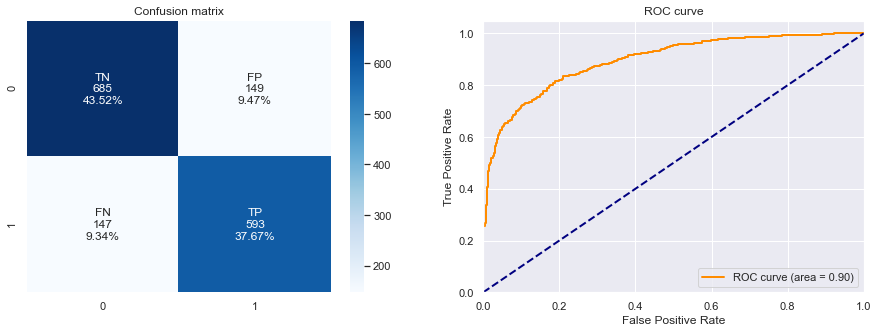

0,811
0,177
0,799
0,801
0,800
0,895


(0.8119440914866582,
 0.1776710684273709,
 0.7991913746630728,
 0.8013513513513514,
 0.8002699055330635,
 0.8953205003564716)

In [108]:
print('mlp + k user info + tfidf')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=10)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)